### ✍ В предыдущем юните мы обсудили, что такое дискретная случайная величина, как её определить и какими характеристиками она описывается.

В математике существует огромное количество различных распределений дискретных случайных величин, однако некоторые из них в теории вероятностей встречаются намного чаще остальных. Они хорошо изучены и называются стандартными. Это:

+ равномерное распределение;
+ распределение Бернулли;
+ биномиальное распределение;
+ распределение Пуассона.

В этом юните мы познакомимся с этими распределениями, узнаем, где они встречаются и какими свойствами обладают.

# **РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ**

## **Равномерное распределение** — это распределение вероятностей, в качестве значений которого могут выступать любые целые числа от $1$ до $N$, а вероятности их появления одинаковы.

### Равномерное распределение применяется там, где нужны равновероятные модели.

---

Например, равномерное распределение пригодится, если для розыгрыша призов необходимо реализовать генератор случайных чисел, который будет с одинаковыми вероятностями выбирать натуральные числа в заданном интервале.

Для равномерного распределения уже известны математическое ожидание

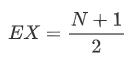

и стандартное отклонение

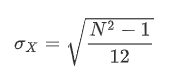

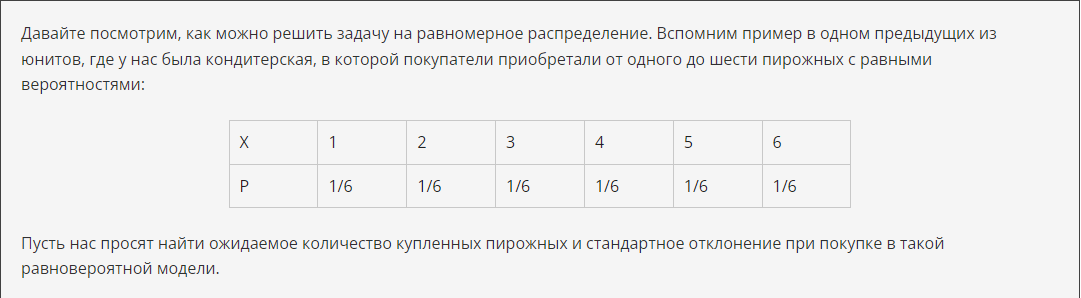

Мы могли бы воспользоваться формулами для этих метрик и рассчитать значения, как мы это делали в предыдущем юните. Но теперь мы знаем, что это равномерное распределение — в нём уже всё рассчитали за нас и вывели более краткие и удобные формулы. Поэтому просто подставляем значения и получаем ответы:

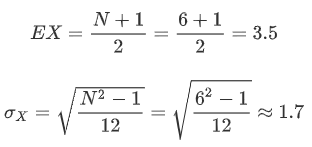

Получаем, что ожидаемое количество купленных пирожных — $3.5$ со стандартным отклонением в $1.7$.

Также мы можем определить ряд распределения для дискретного равномерного распределения с помощью Python. Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно (собственно, это как раз пример с пирожными):

In [3]:
import numpy as np
from scipy.stats import randint

x = np.arange(1, 7)
disc_uni_dist = randint(1, 7)
pmf = disc_uni_dist.pmf(x)
print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого $x_i$ вероятность того, что случайная величина примет значение $x_i$ или меньше:

In [4]:
cdf = disc_uni_dist.cdf(x)
print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


Теперь давайте попробуем с помощью функций Python решить другую задачу.

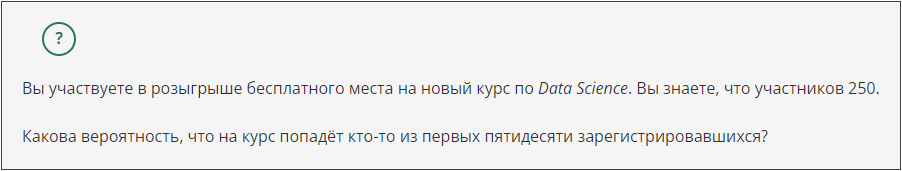



In [5]:
x = np.arange(1, 251)
disc_uni_dist = randint(1,251)
cdf = disc_uni_dist.cdf(x)
print(cdf[49])

0.2


В результате получаем $0.2$ — это вероятность того, что выигрыш получит кто-то, чей порядковый номер — от 1 до 50. Разумеется, вероятность не зависит от самого номера, поэтому для номеров с 51 по 100 вероятность будет ровно такая же.

# **РАСПРЕДЕЛЕНИЕ БЕРНУЛЛИ**

Следующее популярное распределение — это **распределение Бернулли**.

## **Распределение Бернулли**, по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями $p$ и $1-p$ соответственно. Таким образом, распределение Бернулли описывает события, имеющие ровно два исхода. Такие события повсеместно встречаются в реальной жизни (выиграет команда чемпионат или нет, сдаст студент экзамен или провалит его, распознает алгоритм объект на фото или нет).

Кроме того, что распределение Бернулли само по себе моделирует некоторые события из реальной жизни, оно также является фундаментом для других дискретных распределений, таких как биномиальное и геометрическое распределения.

Основной параметр, определяющий это распределение, — $p$ (вероятность «успеха»).

Распределение Бернулли формально описывается следующим образом:


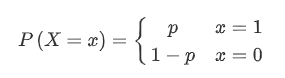

Для этого распределения также известны математическое ожидание

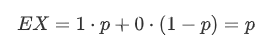

и стандартное отклонение

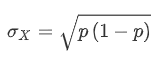


Давайте разберём задачу на применение этого распределения ↓

Вы стреляете по мишени в тире. Вероятность попасть составляет $0.6$. В случае успеха вы выиграете плюшевого медведя стоимостью 3000 рублей, а в случае промаха — не выиграете ничего. У вас есть только один выстрел.

Какой должна быть стоимость билета, чтобы игра была честной, то есть чтобы цена билета равнялась ожидаемому выигрышу, а значит, не уводила в убыток продавца или вас при большом количестве выстрелов?

Пусть случайная величина $X$ принимает значение $1$, если вы попали, и $0$, если промахнулись. Тогда ожидаемое число попаданий равно:


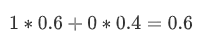

Ожидаемый выигрыш:

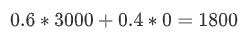

Получаем, что «справедливая» стоимость билета должна быть равна 1800 рублей.

---


С помощью специальной функции Python можно смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


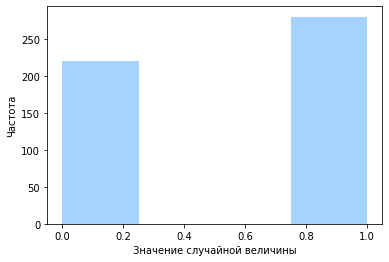

In [6]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500,p=0.6)
ax = sns.distplot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота');

Также можно вывести количество неудач и попаданий в нашей модели:

In [7]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 220]
 [  1 280]]


Итак, мы получили результат, близкий к ожидаемому, но с некоторыми погрешностями, что, разумеется, является нормальным.

# **БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ**

Повторение нескольких независимых испытаний Бернулли называется **процессом Бернулли**. Результаты процесса Бернулли в свою очередь будут следовать **биномиальному распределению**.

## **Биномиальным** называют распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

Параметры биномиального распределения — $n$ и $p$, где $n$ — общее количество испытаний, а $p$ — вероятность успеха в каждом испытании.

Для того чтобы оценить вероятность, что среди $n$ испытаний будет $k$ успехов, используют следующую формулу:

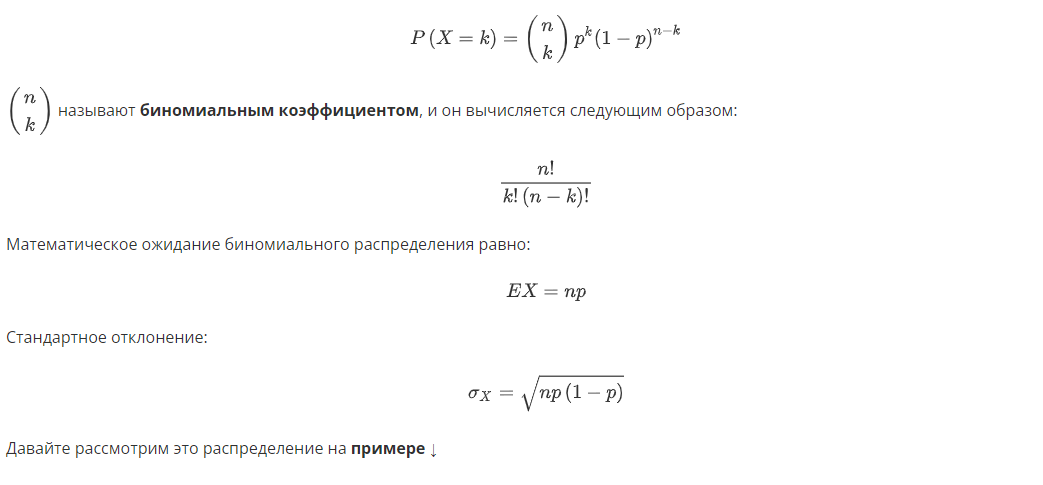

Сравним две рекламных кампании: в одной конверсия составляет 2 %, но баннер увидит 100 000 пользователей, а в другой конверсия 40 %, но охват — всего 5 000 пользователей.

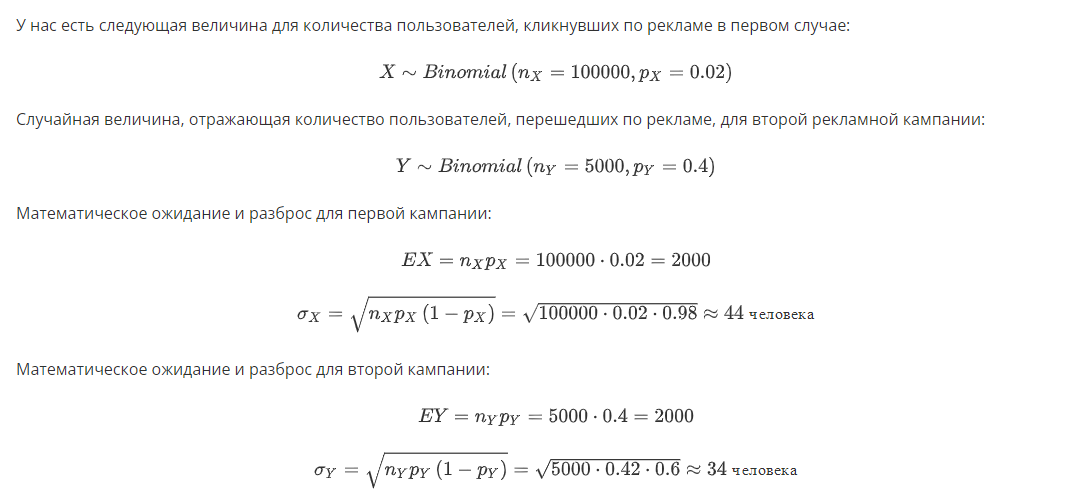

Получаем, что ожидаемое количество кликов в обеих кампаниях одинаковое, так что более выгодным вариантом было бы выбрать менее затратную с финансовой точки зрения.

Также можно сказать, что в первой стратегии разброс значений больше, а значит она менее стабильная.

----

Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

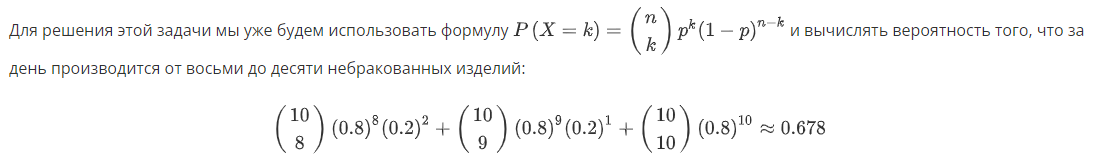

Конечно, это выражение очень сложное с точки зрения вычислений, поэтому для нахождения ответа можно воспользоваться специальными функциями Python:

In [8]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

Получаем, что с вероятностью $0.678$ будет производиться не более двух бракованных изделий в день.

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

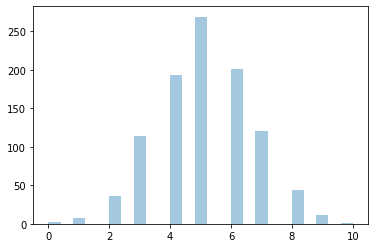

In [9]:
from scipy.stats import binom
from numpy import random
import matplotlib.pyplot as plt

x = random.binomial(n=10, p=0.5, size=10)

sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show();

Можно видеть, что чаще всего можно наблюдать пять успешных исходов.

# **РАСПРЕДЕЛЕНИЕ ПУАССОНА**

## **Распределение Пуассона** — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

Допустим, у нас есть ресторан быстрого питания, в который приходят  в среднем Три посетителя в минуту. Однако это всего лишь средний показатель — фактический показатель может варьироваться.

Распределение Пуассона можно использовать для анализа вероятности различных событий, касающихся того, сколько клиентов придёт в ресторан. С его помощью можно рассчитать вероятность затишья (когда в течение какого-то периода времени не будет ни одного клиента), а также вероятность всплеска активности (когда в ресторан за минуту придут пять и более клиентов). Эта информация, в свою очередь, может помочь менеджеру спланировать рабочую нагрузку и график сотрудников, а также план по закупкам продуктов.

Кроме использования в планировании нагрузки на персонал и производство, распределение Пуассона также используется в биологии (обнаружение мутаций), финансах (прогнозирование количества заявлений о банкротстве или просрочек кредитов), информационной безопасности (предсказание количества вирусных атак) и любой другой ситуации, в которой события не зависят от времени.

В распределении Пуассона значение случайной величины может быть любым неотрицательным числом.  Случайная величина будет обладать следующими характеристиками:

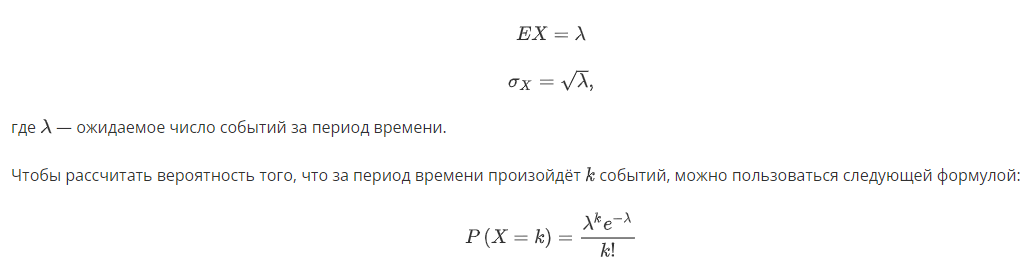

Давайте рассмотрим задачу ↓

Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.

Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вызовы удерживались в ожидании ответа не более 10 % времени?

Рассчитаем вероятности для всех возможных количеств операторов, пока не получим вероятность того, что вызов на удержании, которая будет меньше 10 %:

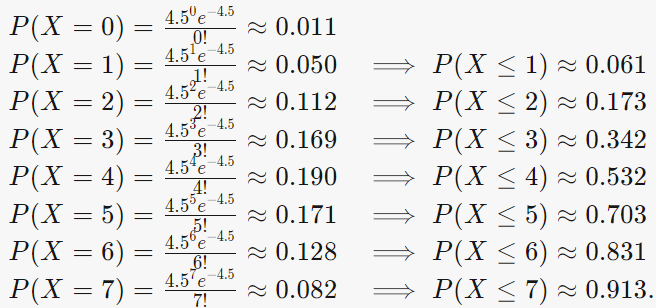

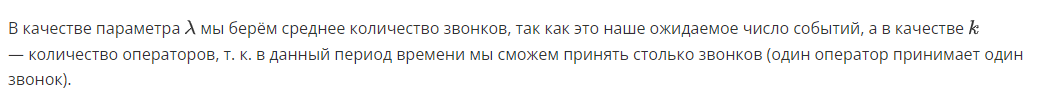

Получаем, что колл-центру необходимо нанять на работу хотя бы семь операторов.

---


Разумеется, все эти значения можно было бы рассчитать намного проще с использованием функций Python. Например, для пяти операторов мы бы получили следующее выражение:

In [10]:
scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

Также можно смоделировать распределение Пуассона. Например, будем рассматривать 1000 реализаций случайной величины, у которой $lam = 3$:

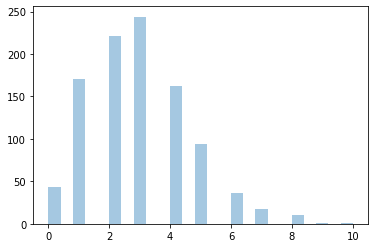

In [11]:
sns.distplot(random.poisson(lam=3, size=1000), kde=False)

plt.show()

Итак, мы рассмотрели самые известные дискретные распределения и познакомились с их свойствами. Данные распределения необходимо знать, так как они используются в различных статистических тестах и алгоритмах машинного обучения: например, распределение Пуассона задействовано в алгоритме решающих деревьев, а на биномиальном распределении основан статистический критерий, который может быть использован в анализе A/B-тестов. В следующем юните мы продолжим знакомство с популярными распределениями, однако это уже будут **непрерывные распределения**.

## Задание 8.1

Вы стреляете по мишени в тире. У вас есть десять выстрелов. Каждый раз вы попадаете в центр мишени с вероятностью 90 %. Какое распределение лучше всего подойдёт для количества попаданий в центр мишени?

+ Биномиальное

## Задание 8.2

Выберите все верные утверждения:

+ Биномиальная случайная величина может иметь математическое ожидание, равное 2.8.
+  Пуассоновская случайная величина может принимать любое целое значение от 0 до +бесконечности.

## Задание 8.3

Вы стреляете по мишени. Вероятность набрать максимальное количество очков составляет 7 %. В этом случае вы выиграете плюшевого медведя стоимостью 5000 рублей. Если наберёте меньше максимума, то не выиграете ничего.

Сколько должен стоить билет, чтобы обеспечить игру, в которой выигрыш равен вашим ожидаемым затратам и ожидаемым затратам продавца?

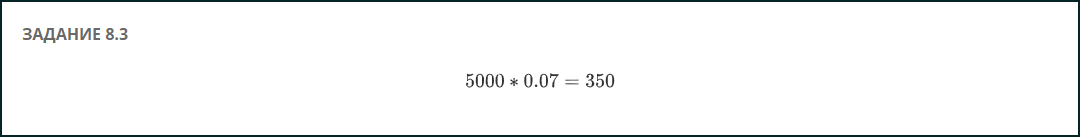

## Задание 8.4

Вы купили 85 лотерейных билетов. Для каждого из них вероятность выигрыша составляет 0.001.

Найдите математическое ожидание для количества выигрышных билетов.

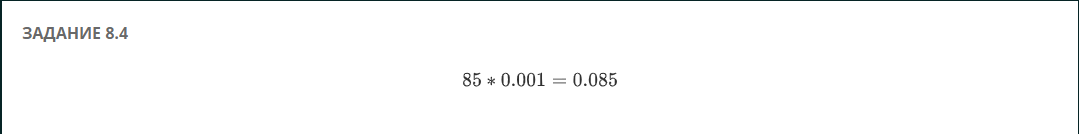



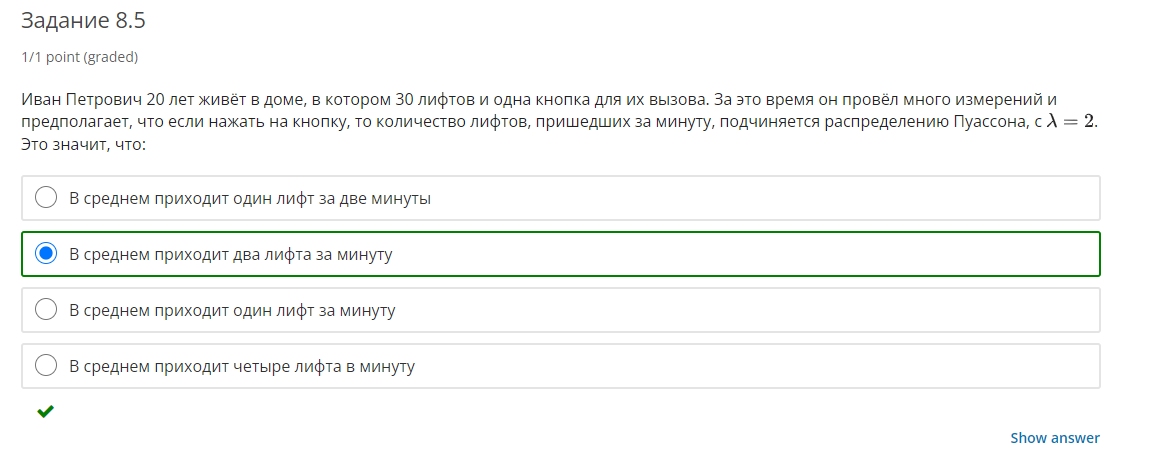

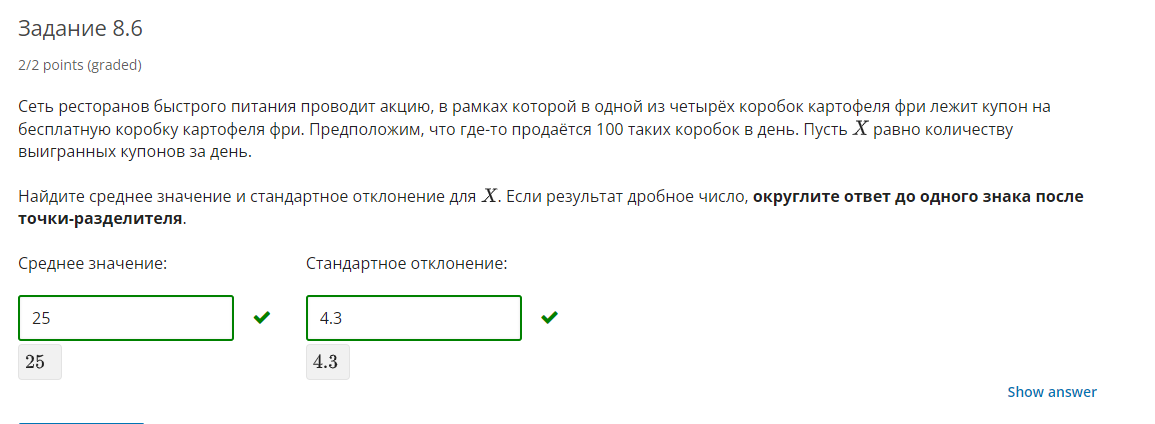

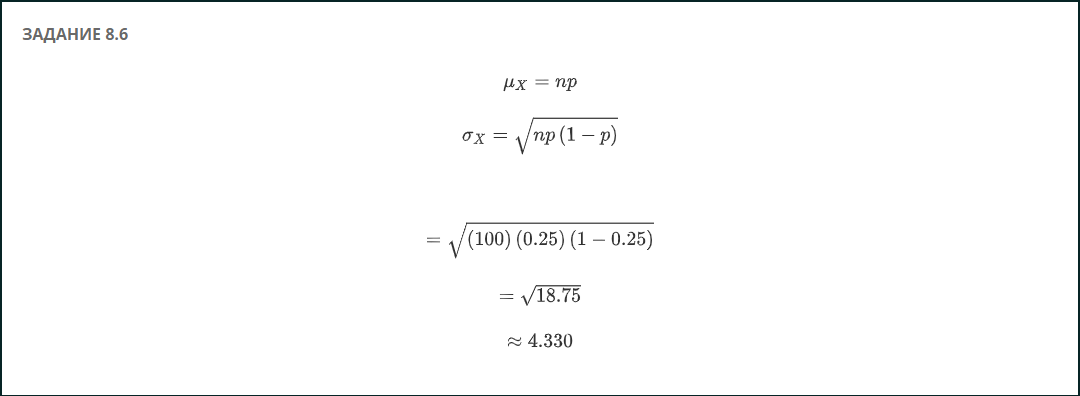

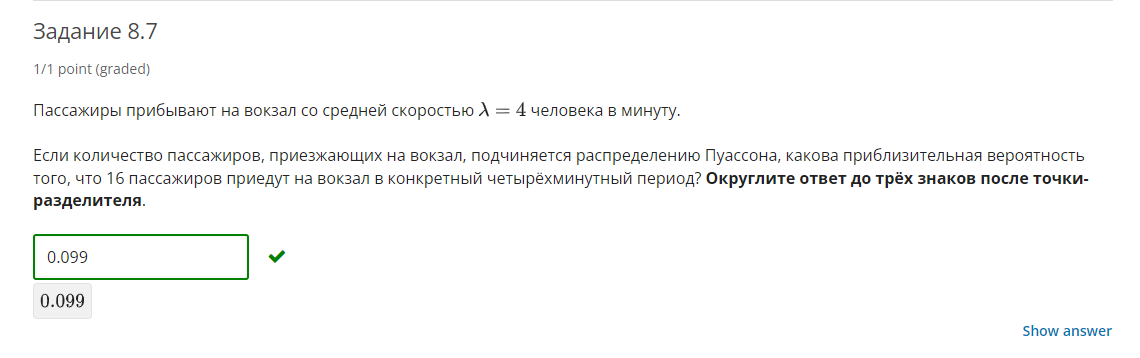

In [12]:
scipy.stats.distributions.poisson.pmf(16, 16)

0.09921753162215541